In [ ]:
!pip install python-bidi
!pip install arabic-reshaper
!pip install matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Data/github_data', index_col=False)

In [ ]:
df.head(2)

,Unnamed: 0.1,F1,court,city,court_id,court_date,appeal_court,region,appeal_id,appeal_date,judgment_text,appeal_text,Unnamed: 0,links,appeal_data,appleal_text
0,0,مجموعة الأحكام القضائية,التجارية,المدينه: الرياض,رقم القضية - القرار: ٥٤٨٣,تاريخها: ٢٦/١١/١٤٤٣,NaN,NaN,NaN,NaN,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,NaN,NaN,NaN,NaN,NaN
1,1,مجموعة الأحكام القضائية,العامة,المدينه: بريدة,رقم القضية - القرار: ٣٣٢,تاريخها: ٢٦/١٠/١٤٤٢,محكمة الاستئناف: المحكمة التجارية,المدينة: منطقة الرياض,رقم القرار: ٥٥٢٨,تاريخه: ٢٤/١٠/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Unnamed: 0.1', 'F1', 'court', 'city', 'court_id', 'court_date',
       'appeal_court', 'region', 'appeal_id', 'appeal_date', 'judgment_text',
       'appeal_text', 'Unnamed: 0', 'links', 'appeal_data', 'appleal_text'],
      dtype='object')

In [ ]:
#columns we dont need
df.drop(columns=['Unnamed: 0.1','Unnamed: 0','links','appeal_data','appleal_text','court_date','appeal_court','appeal_id','region','court_id','F1','appeal_date','appeal_text'], inplace= True)

In [ ]:
df.head(2)

,court,city,judgment_text
0,التجارية,المدينه: الرياض,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...
1,العامة,المدينه: بريدة,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...


In [ ]:
df.isnull().sum()

court             1
city             34
judgment_text     1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   court          2394 non-null   object
 1   city           2361 non-null   object
 2   judgment_text  2394 non-null   object
dtypes: object(3)
memory usage: 56.3+ KB


In [ ]:
df.shape

(2395, 3)

In [ ]:
def handle_arabic(input_string):
    reshaped_text = arabic_reshaper.reshape(input_string)
    return get_display(reshaped_text)

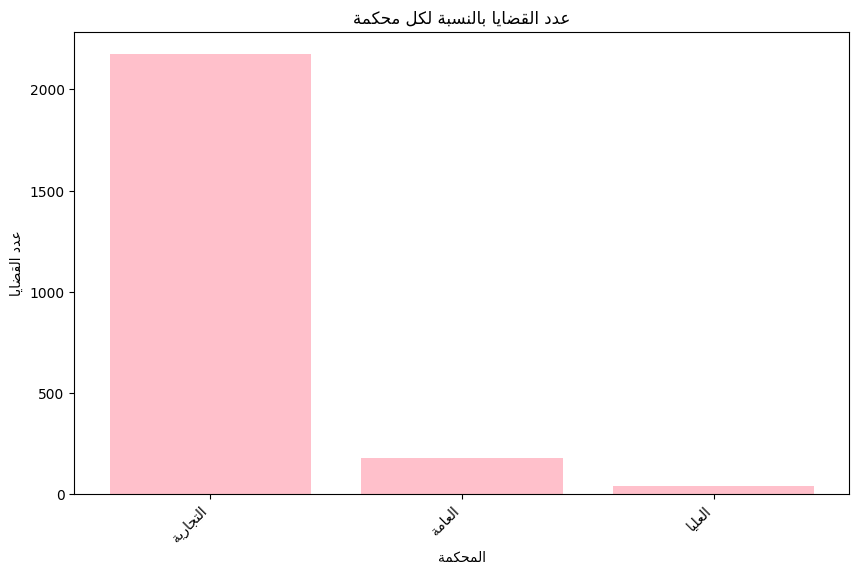

In [ ]:
court_cases_count = df['court'].value_counts()

reshaped_courts = [handle_arabic(court) for court in court_cases_count.index]

most_cases_court = handle_arabic(court_cases_count.idxmax())
least_cases_court = handle_arabic(court_cases_count.idxmin())

plt.figure(figsize=(10, 6))
plt.bar(reshaped_courts, court_cases_count, color='pink')
plt.title(handle_arabic('عدد القضايا بالنسبة لكل محكمة'))
plt.xlabel(handle_arabic('المحكمة'))
plt.ylabel(handle_arabic('عدد القضايا'))
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
df['city'].value_counts()

الرياض             1238
الدمام              459
جدة                 306
المدينة المنورة     114
بريدة                65
جازان                48
أبها                 39
تبوك                 25
سكاكا                14
مكة المكرمة          14
حائل                 13
عرعر                 11
الباحة               10
نجران                 5
Name: city, dtype: int64

In [ ]:
city_cases_count=df.loc[:,'city'].replace('المدينه: ','',regex=True,inplace = True)
df['city'].value_counts()

الرياض             1238
الدمام              459
جدة                 306
المدينة المنورة     114
بريدة                65
جازان                48
أبها                 39
تبوك                 25
سكاكا                14
مكة المكرمة          14
حائل                 13
عرعر                 11
الباحة               10
نجران                 5
Name: city, dtype: int64

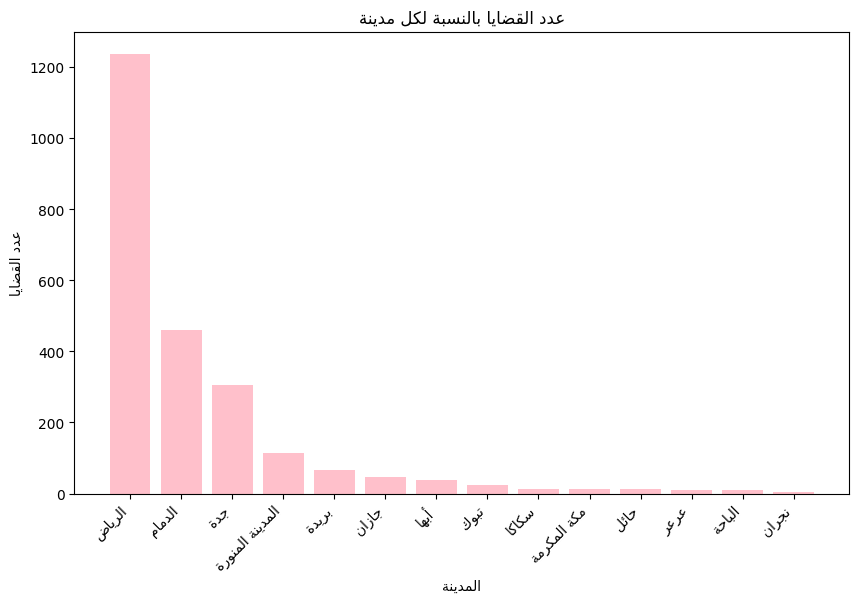

In [ ]:


city_cases_count = df['city'].value_counts()

if isinstance(city_cases_count, pd.Series) and not city_cases_count.empty:
    reshaped_cities = [handle_arabic(city) for city in city_cases_count.index]

    most_cases_city = handle_arabic(city_cases_count.idxmax())
    least_cases_city = handle_arabic(city_cases_count.idxmin())

    plt.figure(figsize=(10, 6))
    plt.bar(reshaped_cities, city_cases_count, color='pink')
    plt.title(handle_arabic('عدد القضايا بالنسبة لكل مدينة'))
    plt.xlabel(handle_arabic('المدينة'))
    plt.ylabel(handle_arabic('عدد القضايا'))
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("Invalid or empty city_cases_count.")


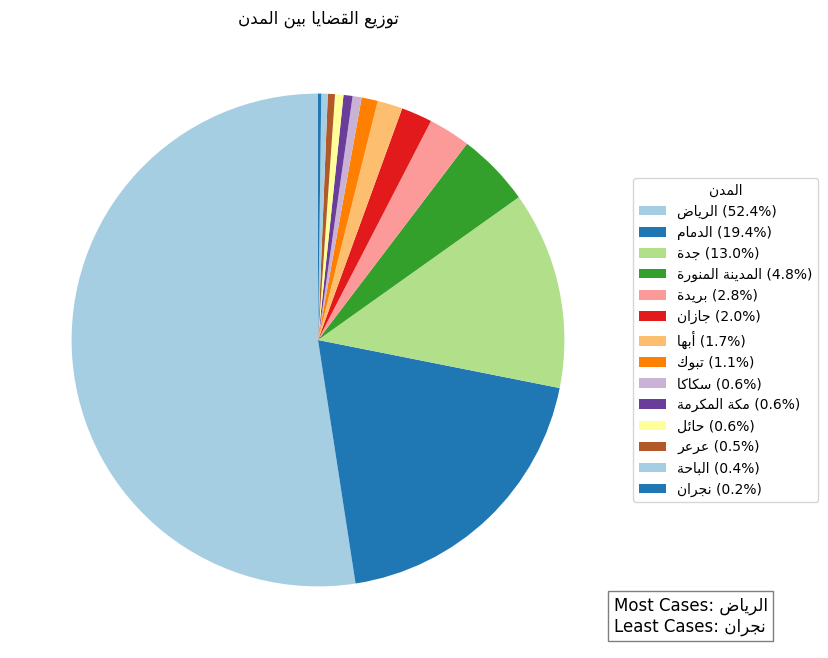

In [ ]:
def handle_arabic(input_string):
    reshaped_text = arabic_reshaper.reshape(input_string)
    return get_display(reshaped_text)

city_cases_count = df['city'].value_counts()

if isinstance(city_cases_count, pd.Series) and not city_cases_count.empty:
    plt.figure(figsize=(10, 8))


    colors = plt.cm.Paired.colors
    wedges, _, _ = plt.pie(city_cases_count, startangle=90, colors=colors, autopct='', textprops={'fontsize': 10})


    most_cases_city = handle_arabic(city_cases_count.idxmax())
    least_cases_city = handle_arabic(city_cases_count.idxmin())
    corner_label = f"Most Cases: {most_cases_city}\nLeast Cases: {least_cases_city}"
    plt.text(1.2, -1.2, corner_label, fontsize=12, va='bottom', bbox=dict(facecolor='white', alpha=0.5))


    reshaped_cities = [handle_arabic(city) for city in city_cases_count.index]
    legend_labels = [f'{city} ({percentage:.1f}%)' for city, percentage in zip(reshaped_cities, city_cases_count / city_cases_count.sum() * 100)]
    plt.legend(legend_labels, title=handle_arabic('المدن'), bbox_to_anchor=(1, 0.5), loc='center left')

    plt.title(handle_arabic('توزيع القضايا بين المدن'))
    plt.show()
else:
    print("Invalid or empty city_cases_count.")
